In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
len(dataset)

60000

In [4]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x19346572BC8>, 5)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


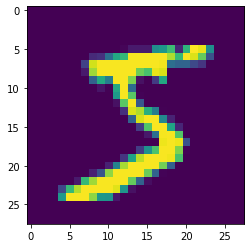

In [6]:
image, label = dataset[0]
plt.imshow(image)
print('Label:', label)

Label: 3


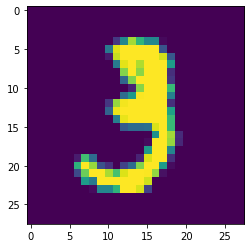

In [7]:
image, label = dataset[10]

plt.imshow(image)
print('Label:', label)

In [8]:
import torchvision.transforms as transforms


In [9]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


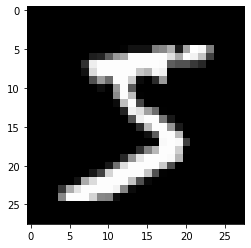

In [12]:
plt.imshow(img_tensor[0], cmap='gray')

In [13]:
import numpy as np

def split_indices(n, val_pct):
    n_val = int(val_pct*n)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [14]:
train_indices, val_indices = split_indices(len(dataset), 0.2)
print(len(train_indices), len(val_indices))
print('Sample val indices: ', val_indices[:20])

48000 12000
Sample val indices:  [11520 24132 30618 34337  3934 20613 54934 32088 39203 34872 15569  2017
  9976 48537 55158 58078 12196 21504 13966 55157]


In [15]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader


In [16]:
batch_size=100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                          batch_size,
                          sampler = val_sampler)

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight



torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0327, -0.0078, -0.0286,  ...,  0.0116,  0.0221, -0.0069],
        [-0.0193,  0.0131, -0.0106,  ..., -0.0345, -0.0058,  0.0213],
        [-0.0129, -0.0338, -0.0236,  ...,  0.0066,  0.0348, -0.0148],
        ...,
        [ 0.0308, -0.0217, -0.0033,  ..., -0.0279,  0.0307, -0.0339],
        [-0.0053,  0.0176,  0.0345,  ..., -0.0232,  0.0342, -0.0181],
        [-0.0112,  0.0312,  0.0104,  ...,  0.0003,  0.0068, -0.0054]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0176,  0.0028, -0.0071, -0.0029,  0.0103, -0.0214,  0.0053, -0.0117,
         0.0162,  0.0057], requires_grad=True)

In [20]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        # xb: tensor, 多组数据，不定长（一般为batch_size)
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [21]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs : ', outputs[:2].data)
print('Sum of line 1 : \n', torch.sum(outputs[1].data))

outputs.shape :  torch.Size([100, 10])
Sample outputs :  tensor([[ 0.1888,  0.1505,  0.0710,  0.2540,  0.1103,  0.2085,  0.2565,  0.1072,
          0.2742, -0.2371],
        [-0.0076, -0.0345,  0.1923, -0.0011, -0.0899, -0.2090,  0.1732, -0.0688,
          0.1281, -0.0795]])
Sum of line 1 : 
 tensor(0.0034)


In [22]:
import torch.nn.functional as F


In [23]:
probs = F.softmax(outputs, dim=1)

print("Sample probabilities:\n", probs[:2].data)

print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1042, 0.1003, 0.0926, 0.1112, 0.0963, 0.1063, 0.1115, 0.0960, 0.1135,
         0.0681],
        [0.0985, 0.0959, 0.1203, 0.0991, 0.0907, 0.0805, 0.1180, 0.0926, 0.1128,
         0.0916]])
Sum:  0.9999998807907104


In [24]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)


tensor([8, 2, 2, 2, 2, 2, 2, 8, 2, 8, 2, 2, 2, 8, 0, 2, 8, 2, 8, 2, 2, 8, 2, 2,
        2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 9, 7, 8, 2, 8, 5, 9, 6, 2,
        2, 9, 8, 8, 5, 5, 2, 2, 9, 3, 3, 3, 2, 2, 2, 2, 8, 2, 8, 3, 2, 2, 9, 8,
        3, 9, 6, 2, 2, 8, 2, 9, 6, 2, 6, 5, 2, 2, 2, 2, 7, 2, 2, 2, 6, 2, 9, 2,
        2, 8, 2, 2])


In [25]:
labels


tensor([0, 5, 2, 4, 0, 8, 9, 9, 8, 7, 8, 5, 7, 0, 8, 8, 0, 8, 0, 1, 0, 9, 6, 2,
        8, 2, 3, 6, 2, 3, 7, 6, 4, 2, 4, 0, 8, 2, 1, 1, 5, 0, 5, 7, 3, 3, 5, 5,
        9, 1, 4, 9, 6, 4, 7, 3, 1, 5, 4, 5, 4, 6, 8, 7, 9, 2, 5, 5, 3, 9, 1, 5,
        6, 1, 1, 0, 4, 5, 7, 2, 5, 4, 8, 2, 3, 5, 4, 4, 3, 2, 7, 9, 3, 8, 1, 0,
        2, 7, 4, 8])

In [26]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3359, grad_fn=<NllLossBackward>)


In [27]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)


In [28]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    #calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)

    if opt is not None: 
        #calculate gradients
        loss.backward()
        #updata parameters
        opt.step()
        #reset gradients
        opt.zero_grad()

    metric_result = None
    if metric is not None:
        #calculate the metric
        metric_result = metric(preds, yb)

    return loss.item(), len(xb), metric_result

In [29]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric) for xb,yb in valid_dl]
        # separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # total size of the dataset
        total = np.sum(nums)
        # avg. loss across batches
        total_loss = np.sum(np.multiply(losses, nums))
        avg_loss = total_loss / total
        avg_metric = None
        if metric is not None:
            # avg. of metric across batches
            tot_metric = np.sum(np.multiply(metrics, nums))
            avg_metric = tot_metric / total

    return avg_loss, total, avg_metric

In [30]:
def accuracy(outputs, labels):
    self.__name__ = "Accuracy"
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [31]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

NameError: name 'self' is not defined

In [33]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    # training
    for epoch in range(epochs):
        for xb, yb in train_dl:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)
    
        # evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result

        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}: {:.4f}'.format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

    

In [34]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8885, accuracy: 0.6522
Epoch [2/5], Loss: 1.5873, accuracy: 0.7507
Epoch [3/5], Loss: 1.3749, accuracy: 0.7815
Epoch [4/5], Loss: 1.2217, accuracy: 0.7977
Epoch [5/5], Loss: 1.1085, accuracy: 0.8068


In [50]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7822, accuracy: 0.8389
Epoch [2/5], Loss: 0.7542, accuracy: 0.8420
Epoch [3/5], Loss: 0.7298, accuracy: 0.8445
Epoch [4/5], Loss: 0.7082, accuracy: 0.8469
Epoch [5/5], Loss: 0.6892, accuracy: 0.8490


In [56]:
test_dataset = MNIST(root='data',
                          train=False,
                          transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


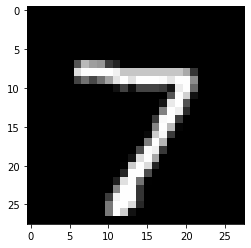

In [58]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [68]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 6 , Predicted: 1


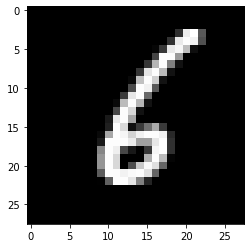

In [90]:
img, label = test_dataset[1886]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))


In [92]:
test_loader = DataLoader(test_dataset, batch_size=200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.6654, Accuracy: 0.8631


In [93]:
torch.save(model.state_dict(), 'mnist-logistic.pth')